In [32]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, NuSVC, LinearSVC
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Topics_LEMM_DF.csv", index_col = 0).dropna()

In [3]:
df = df.drop(columns = "right")

In [4]:
print(len(df))
df1 = df.loc[df["Topic"] == "rights"]
print(len(df1))

528
186


In [5]:
print(len(df))
df2 = df.loc[df["Topic"] == "surgery"]
print(len(df2))

528
157


In [6]:
df = pd.concat([df1,df2])
print(len(df))

343


In [73]:
X = df.drop(columns = "Topic")
X

,abandoned,abet,ability,able,abortion,absurdity,absurdum,abubaker,abuse,abused,...,wrote,year,yesterday,york,young,youth,youtube,youtuber,zero,zeroed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
560,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
561,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
y = df["Topic"]
y

0       rights
1       rights
2       rights
3       rights
4       rights
        ...   
559    surgery
560    surgery
561    surgery
562    surgery
563    surgery
Name: Topic, Length: 343, dtype: object

In [75]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)


In [10]:
X_train

,abandoned,abet,ability,able,abortion,absurdity,absurdum,abubaker,abuse,abused,...,wrote,year,yesterday,york,young,youth,youtube,youtuber,zero,zeroed
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
113,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_test

,abandoned,abet,ability,able,abortion,absurdity,absurdum,abubaker,abuse,abused,...,wrote,year,yesterday,york,young,youth,youtube,youtuber,zero,zeroed
454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
#RBF Kernel

clf = SVC(C=1, kernel="rbf", verbose=False)
clf.fit(X_train, y_train) 

y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))

cmat = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cmat)

Accuracy:  0.6099585062240664
              precision    recall  f1-score   support

      rights       0.61      0.83      0.70       134
     surgery       0.61      0.34      0.43       107

    accuracy                           0.61       241
   macro avg       0.61      0.58      0.57       241
weighted avg       0.61      0.61      0.58       241


The confusion matrix is:
[[111  23]
 [ 71  36]]


In [13]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(clf, param_grid, refit = True, verbose = False) 

grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(C=1),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=False)

In [14]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [15]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

confusion_mat = confusion_matrix(y_test, grid_predictions)
print("\nThe confusion matrix is:")
print(confusion_mat)

              precision    recall  f1-score   support

      rights       0.63      0.76      0.69       134
     surgery       0.60      0.45      0.51       107

    accuracy                           0.62       241
   macro avg       0.62      0.60      0.60       241
weighted avg       0.62      0.62      0.61       241


The confusion matrix is:
[[102  32]
 [ 59  48]]


In [16]:
clf = SVC(C=10, gamma = 0.01, kernel="rbf", verbose=False)
clf.fit(X_train, y_train) 

y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))

cmat = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cmat)

Accuracy:  0.6224066390041494
              precision    recall  f1-score   support

      rights       0.63      0.76      0.69       134
     surgery       0.60      0.45      0.51       107

    accuracy                           0.62       241
   macro avg       0.62      0.60      0.60       241
weighted avg       0.62      0.62      0.61       241


The confusion matrix is:
[[102  32]
 [ 59  48]]


In [17]:
lsvc = SVC(C=1, kernel = "linear", verbose=False)
lsvc.fit(X_train, y_train) 
y_pred =lsvc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
confusion_mat = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(confusion_mat)
print(classification_report(y_test, y_pred))

Accuracy:  0.6224066390041494

The confusion matrix is:
[[93 41]
 [50 57]]
              precision    recall  f1-score   support

      rights       0.65      0.69      0.67       134
     surgery       0.58      0.53      0.56       107

    accuracy                           0.62       241
   macro avg       0.62      0.61      0.61       241
weighted avg       0.62      0.62      0.62       241



In [18]:
parameters = {'kernel':['linear'], 'C':[0.1, 1, 10,100,1000]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']})

In [19]:
# print best parameter after tuning 
print(clf.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(clf.best_estimator_) 
clf_pred = clf.predict(X_test)
  
# print classification report 
print(classification_report(y_test, clf_pred))

confusion_mat = confusion_matrix(y_test, clf_pred)
print("\nThe confusion matrix is:")
print(confusion_mat)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')
              precision    recall  f1-score   support

      rights       0.65      0.69      0.67       134
     surgery       0.58      0.53      0.56       107

    accuracy                           0.62       241
   macro avg       0.62      0.61      0.61       241
weighted avg       0.62      0.62      0.62       241


The confusion matrix is:
[[93 41]
 [50 57]]


In [65]:
support_vector_indices = lsvc.support_
print(support_vector_indices)

[  0   1   2   3   5   6   8   9  11  15  18  21  22  23  24  25  26  27
  28  42  43  48  50  51  53  55  56  59  60  62  64  68  69  70  74  75
  76  79  81  87  88  89  90  91  94  96  98  99 101   4   7  10  12  13
  16  17  19  29  30  31  32  33  34  35  36  37  38  39  40  41  45  52
  54  57  58  61  63  65  66  67  71  72  73  77  78  82  83  84  85  86
  92  93  95  97 100]


In [67]:
support_vectors_per_class = lsvc.n_support_
print(support_vectors_per_class)

[49 46]


In [20]:
def label(row):
    if row == "surgery":
        return 2
    if row == "rights":
        return 1


In [21]:
psvc = SVC(C=1, kernel = "poly", degree = 2, gamma = 0.01, verbose=False)
psvc.fit(X_train, y_train) 
y_pred =psvc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
confusion_mat = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(confusion_mat)
print(classification_report(y_test, y_pred))

Accuracy:  0.5560165975103735

The confusion matrix is:
[[134   0]
 [107   0]]
              precision    recall  f1-score   support

      rights       0.56      1.00      0.71       134
     surgery       0.00      0.00      0.00       107

    accuracy                           0.56       241
   macro avg       0.28      0.50      0.36       241
weighted avg       0.31      0.56      0.40       241



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
parameters = {'kernel':['poly'], 'C':[0.1, 1, 10,100,1000], 'gamma':[1,0.1,0.01,0.001], "degree":[1,2,3,4,5,6,7,8,9,10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['poly']})

In [23]:
# print best parameter after tuning 
print(clf.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(clf.best_estimator_) 
clf_pred = clf.predict(X_test)
  
# print classification report 
print(classification_report(y_test, clf_pred))

confusion_mat = confusion_matrix(y_test, clf_pred)
print("\nThe confusion matrix is:")
print(confusion_mat)

{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
SVC(C=0.1, degree=2, gamma=1, kernel='poly')
              precision    recall  f1-score   support

      rights       0.61      0.85      0.71       134
     surgery       0.63      0.32      0.42       107

    accuracy                           0.61       241
   macro avg       0.62      0.58      0.57       241
weighted avg       0.62      0.61      0.58       241


The confusion matrix is:
[[114  20]
 [ 73  34]]


In [24]:
y_new = y.copy()
y_new["label"] = y_new.apply(label)
y_n = y_new["label"]
y_n

0      1
1      1
2      1
3      1
4      1
      ..
559    2
560    2
561    2
562    2
563    2
Name: Topic, Length: 343, dtype: int64

In [77]:
X_train, X_test, y_train_n, y_test_n = train_test_split(X, y_n, test_size=0.7, random_state=42)

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [80]:
from sklearn.linear_model import LogisticRegression  
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train_n)

LogisticRegression(random_state=0)

In [81]:
y_pred = classifier.predict(X_test)

In [82]:
cm = confusion_matrix(y_test_n, y_pred)

In [84]:
support_vector_indices = lsvc.support_
print(support_vector_indices)

[  0   1   2   3   5   6   8   9  11  15  18  21  22  23  24  25  26  27
  28  42  43  48  50  51  53  55  56  59  60  62  64  68  69  70  74  75
  76  79  81  87  88  89  90  91  94  96  98  99 101   4   7  10  12  13
  16  17  19  29  30  31  32  33  34  35  36  37  38  39  40  41  45  52
  54  57  58  61  63  65  66  67  71  72  73  77  78  82  83  84  85  86
  92  93  95  97 100]


In [85]:
support_vectors_per_class = lsvc.n_support_
print(support_vectors_per_class)

[49 46]


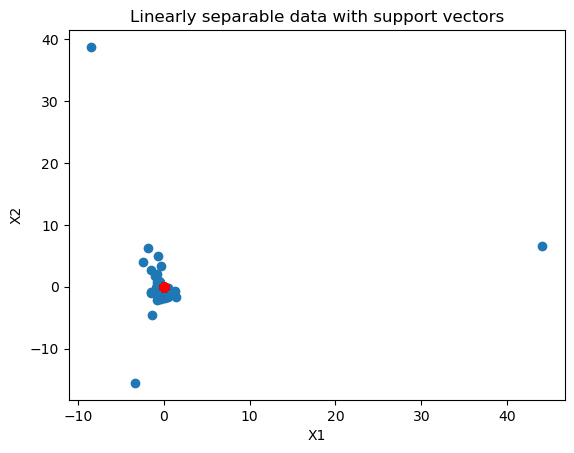

In [86]:
support_vectors = lsvc.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()